In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from macrohet import visualise
from tqdm.auto import tqdm
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

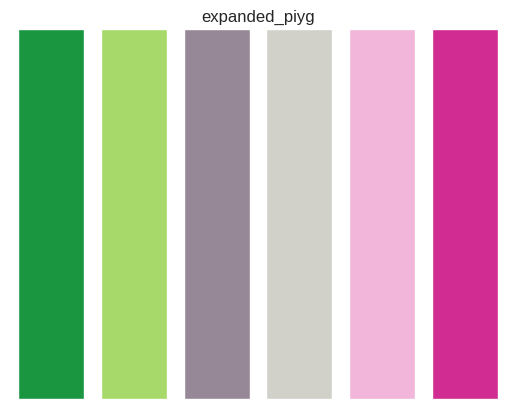

['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91']


In [15]:
# set display params
sns.set(style = 'white')
# Set the default font to Helvetica
mpl.rcParams['font.family'] = 'Liberation Sans'
# Get the color palette of the PiYG color map
expanded_piyg = visualise.color_palette('expanded_piyg').colors
sns.set_palette(expanded_piyg)
# Display the colors in the PiYG color map
visualise.show_colors('expanded_piyg')
print(expanded_piyg)

In [5]:
output_dir = '/mnt/DATA/macrohet/results/preliminary_sc_measures/cumulative_sc_plots/thresholded_480/'#'/Users/dayn/data/macrohet_mac/temp_results/'#
os.makedirs(output_dir, exist_ok = True)

In [57]:
df = pd.read_pickle('/mnt/DATA/macrohet/results/preliminary_sc_measures/sc_dfs/sc_df_GT_70_area.pkl')
# Assuming your DataFrame is named 'df'
df['Strain/Compound'] = df['Compound']  # Create a new column and copy values from 'Compound'
# Replace values in 'NewColumn' where 'Strain' is 'RD1' with 'RD1'
df.loc[df['Strain'] == 'RD1', 'Strain/Compound'] = 'RD1'
df

Time (hours)   Mtb Area        dMtb Strain Compound  \
Unique ID                                                               
1.3.5     0                  0  46.797680  136.772588     WT     CTRL   
          1                  1  48.719647  136.772588     WT     CTRL   
          2                  2  52.206007  136.772588     WT     CTRL   
          3                  3  50.552221  136.772588     WT     CTRL   
          4                  4  54.463202  136.772588     WT     CTRL   
...                        ...        ...         ...    ...      ...   
996.4.5   296992            70   0.000000   -3.888632     WT     CTRL   
          296993            71   0.000000   -3.888632     WT     CTRL   
          296994            72   0.000000   -3.888632     WT     CTRL   
          296995            73   0.000000   -3.888632     WT     CTRL   
          296996            74   0.000000   -3.888632     WT     CTRL   

                 Concentration Unique ID Acquisition ID  Cell ID  Mphi Area  \
Unique ID                                                                     
1.3.5     0                EC0     1.3.5         (3, 5)        1    29567.0   
          1                EC0     1.3.5         (3, 5)        1    26181.0   
          2                EC0     1.3.5         (3, 5)        1    26043.0   
          3                EC0     1.3.5         (3, 5)        1    25605.0   
          4                EC0     1.3.5         (3, 5)        1    26430.0   
...                        ...       ...            ...      ...        ...   
996.4.5   296992           EC0   996.4.5         (4, 5)      996    32533.0   
          296993           EC0   996.4.5         (4, 5)      996    31403.0   
          296994           EC0   996.4.5         (4, 5)      996    33239.0   
          296995           EC0   996.4.5         (4, 5)      996    42445.0   
          296996           EC0   996.4.5         (4, 5)      996    35463.0   

                  ...  Technical Replicate  Strain/Compound   dMtb/dt  \
Unique ID         ...                                                   
1.3.5     0       ...                    1             CTRL  0.000000   
          1       ...                    1             CTRL  1.921968   
          2       ...                    1             CTRL  3.486360   
          3       ...                    1             CTRL -1.653786   
          4       ...                    1             CTRL  3.910981   
...               ...                  ...              ...       ...   
996.4.5   296992  ...                    2             CTRL  0.000000   
          296993  ...                    2             CTRL  0.000000   
          296994  ...                    2             CTRL  0.000000   
          296995  ...                    2             CTRL  0.000000   
          296996  ...                    2             CTRL  0.000000   

                  %dMtb/dt      %dMtb  Mean Mtb Intensity  \
Unique ID                                                   
1.3.5     0       0.000000  292.26361          473.168976   
          1       4.106972  292.26361          498.701813   
          2       7.155963  292.26361          502.468353   
          3      -3.167808  292.26361          501.905182   
          4       7.736516  292.26361          502.564423   
...                    ...        ...                 ...   
996.4.5   296992  0.000000 -100.00000          385.325806   
          296993  0.000000 -100.00000          384.643707   
          296994  0.000000 -100.00000          384.512726   
          296995  0.000000 -100.00000          383.335663   
          296996  0.000000 -100.00000          384.480499   

                 Thresholded Mean Mtb Intensity  Infection Status  \
Unique ID                                                           
1.3.5     0                          167.325424              True   
          1                          202.661972              True   
          2         

In [80]:
df.keys()

Index(['Time (hours)', 'Mtb Area', 'dMtb', 'Strain', 'Compound',
       'Concentration', 'Unique ID', 'Acquisition ID', 'Cell ID', 'Mphi Area',
       'Mphi GFP', 'x', 'y', 'Eccentricity', 'MSD', 'Technical Replicate',
       'Strain/Compound', 'dMtb/dt', '%dMtb/dt', '%dMtb', 'Mean Mtb Intensity',
       'Thresholded Mean Mtb Intensity', 'Infection Status',
       'Initial Infection Status', 'Final Infection Status', 'dMtb/dt,T=15',
       'Max. dMtb/dt'],
      dtype='object')

In [8]:
# df['dMtb'] = df['delta Mtb max fold-change normalised max area']
df['Mtb'] = df['Mtb Area'] #df['Intracellular thresholded Mtb content smooth']

In [23]:
unique_ID = '85.4.5'
sc_df = df.loc[unique_ID]
sc_df

,Time (hours),Mtb Area,dMtb,Strain,Compound,Concentration,Unique ID,Acquisition ID,Cell ID,Mphi Area,...,Strain/Compound,dMtb/dt,%dMtb/dt,%dMtb,Mean Mtb Intensity,Thresholded Mean Mtb Intensity,Infection Status,Initial Infection Status,Final Infection Status,Rolling Avg dMtb/dt
281595,0,2675.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,46764.0,...,CTRL,0.0,0.000000,201.271028,443.901398,127.701759,True,True,True,0.104293
281596,1,2376.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,62884.0,...,CTRL,-299.0,-11.177570,201.271028,402.362885,75.280693,True,True,True,-20.000379
281597,2,2276.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,67435.0,...,CTRL,-100.0,-4.208754,201.271028,390.603058,62.043819,True,True,True,-26.695353
281598,3,2608.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,48134.0,...,CTRL,332.0,14.586995,201.271028,428.111389,112.511589,True,True,True,-4.615656
281599,4,2398.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,60039.0,...,CTRL,-210.0,-8.052147,201.271028,403.103180,79.544876,True,True,True,-18.585858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281665,70,9059.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,14227.0,...,CTRL,155.0,1.740791,201.271028,2083.896240,1993.407959,True,True,True,68.266667
281666,71,8928.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,13664.0,...,CTRL,-131.0,-1.446076,201.271028,2144.229248,2056.757812,True,True,True,49.000000
281667,72,8303.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,12339.0,...,CTRL,-625.0,-7.000448,201.271028,2249.445312,2164.719971,True,True,True,4.333333
281668,73,6219.0,5384.0,WT,CTRL,EC0,85.4.5,"(4, 5)",85,9494.0,...,CTRL,-2084.0,-25.099362,201.271028,2205.718750,2113.622314,True,True,True,-149.933333


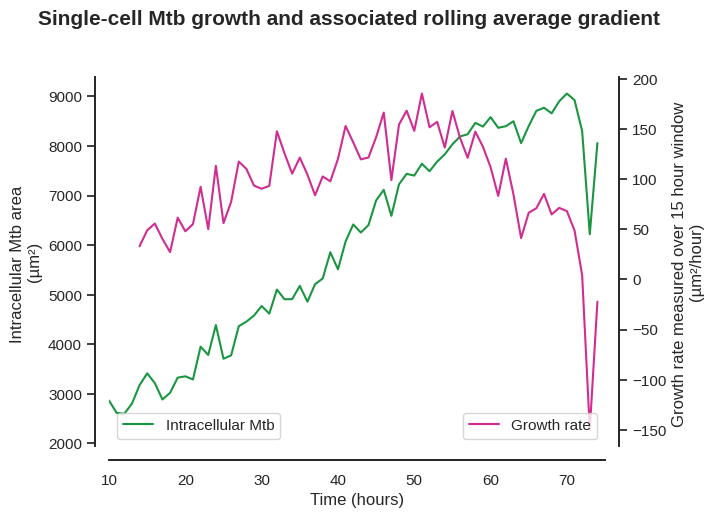

In [27]:

# Calculate the rolling average of 'dMtb/dt' over a specified window (e.g., 15)
window_size = 15
sc_df['Rolling Avg dMtb/dt'] = sc_df['dMtb/dt'].rolling(window=window_size).mean()

# Create the first plot
ax1 = sns.lineplot(x='Time (hours)', y='Mtb Area', data=sc_df, color=expanded_piyg[0], label='Intracellular Mtb')
plt.legend(loc='lower left')
ax1.set_ylabel('Intracellular Mtb area \n(µm\u00b2)')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the rolling average on the second y-axis
sns.lineplot(x='Time (hours)', y='Rolling Avg dMtb/dt', data=sc_df, ax=ax2, color=expanded_piyg[-1], label='Growth rate')  # Adjust color as needed

# Set the y-axis label for the second y-axis
ax2.set_ylabel(f'Growth rate measured over {window_size} hour window \n(µm\u00b2/hour)')
plt.legend(loc='lower right')

# Adjust plot appearance
sns.despine(offset=10, top=True, right=False)
plt.xlim(10, 75)  # Adjust as per your data

# Set the x-axis label and title for the plot
ax1.set_xlabel('Time (hours)')
plt.gcf().suptitle('Single-cell Mtb growth and associated rolling average gradient', 
                   fontsize=15, fontweight='bold', y=1.02)

plt.show()

### Is this max gradient correlated to antibiotic condition?

In [67]:
unique_ids = df['Unique ID'].unique()
len(unique_ids)

3988

In [73]:
unique_ids = df['Unique ID'].unique()
rolling_means = pd.Series(index=df.index)  # Initialize a Series to store the rolling means
max_rolling_means = {}
window_size = 15  # Define your window size

for cell_id in tqdm(unique_ids, total = len(unique_ids)):
    # Filter the DataFrame for the current cell ID
    cell_data = df[df['Unique ID'] == cell_id]

    # Calculate the rolling mean for this cell
    rolling_mean = cell_data['dMtb/dt'].rolling(window=window_size).mean()

    # Store the results in the rolling_means Series
    rolling_means[cell_data.index] = rolling_mean

    # Store the maximum rolling mean for this cell ID
    max_rolling_means[cell_id] = rolling_mean.max()

# Assign the rolling means back to the DataFrame
df[f'dMtb/dt,T={window_size}'] = rolling_means

# Create a new column for the maximum rolling mean per unique ID
df['Max Rolling Mean'] = df['Unique ID'].map(max_rolling_means)

  0%|          | 0/3988 [00:00<?, ?it/s]

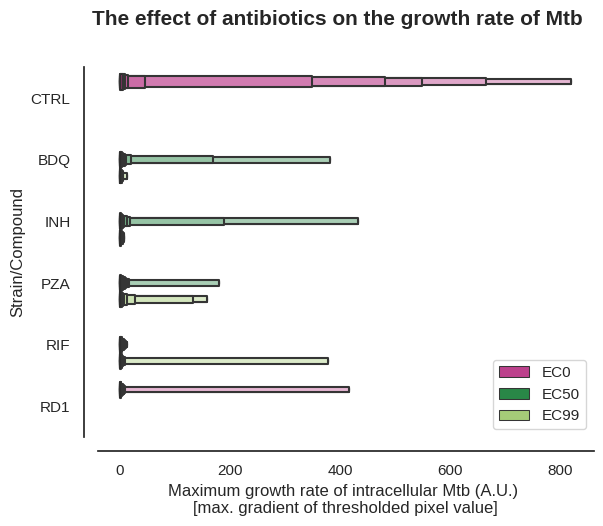

In [79]:
df
g = sns.boxenplot(x="Max. dMtb/dt", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale = 'linear'
              )  
sns.despine(offset = 10)
plt.xlabel("Maximum growth rate of intracellular Mtb (A.U.) \n[max. gradient of thresholded pixel value]")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
# plt.savefig(os.path.join(output_dir, 'ATB_effect_max_growth_rate.png'), bbox_inches = 'tight', dpi = 314)

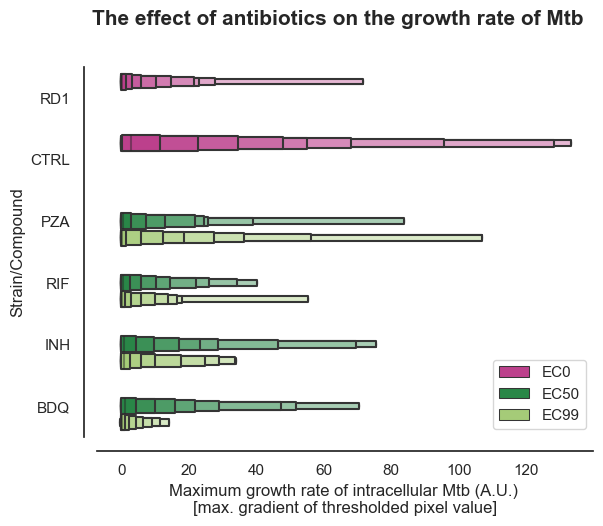

In [163]:
g = sns.boxenplot(x="Max. dMtb gradient", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale = 'linear'
              )  
sns.despine(offset = 10)
plt.xlabel("Maximum growth rate of intracellular Mtb (A.U.) \n[max. gradient of thresholded pixel value]")
plt.gcf().suptitle('The effect of antibiotics on the growth rate of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(output_dir, 'ATB_effect_max_growth_rate.png'), bbox_inches = 'tight', dpi = 314)

In [92]:
help(sns.boxenplot)

Help on function boxenplot in module seaborn.categorical:

boxenplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, k_depth='tukey', linewidth=None, scale='exponential', outlier_prop=0.007, trust_alpha=0.05, showfliers=True, ax=None, box_kws=None, flier_kws=None, line_kws=None)
    Draw an enhanced box plot for larger datasets.
    
    This style of plot was originally named a "letter value" plot because it
    shows a large number of quantiles that are defined as "letter values".  It
    is similar to a box plot in plotting a nonparametric representation of a
    distribution in which all features correspond to actual observations. By
    plotting more quantiles, it provides more information about the shape of
    the distribution, particularly in the tails. For a more extensive
    explanation, you can read the paper that introduced the plot:
    https://vita.had.co.nz/papers/letter-v

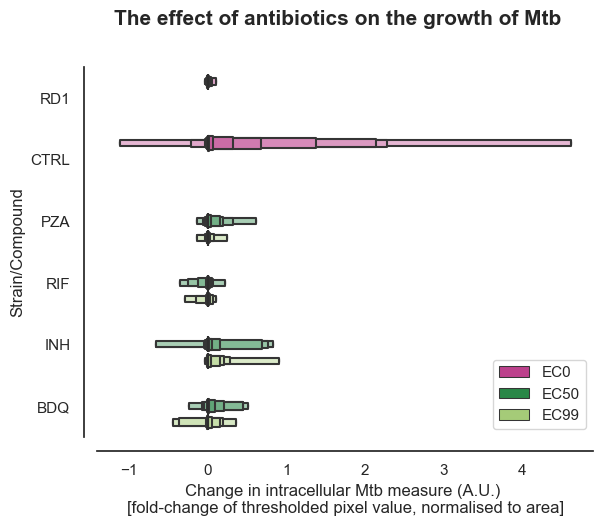

In [164]:
sns.boxenplot(x="dMtb", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale='linear'
              )  
sns.despine(offset = 10)
# plt.xlim(0,5)
plt.xlabel("Change in intracellular Mtb measure (A.U.) \n[fold-change of thresholded pixel value, normalised to area]")
plt.gcf().suptitle('The effect of antibiotics on the growth of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(output_dir, 'dMtb_boxenplot.png'), bbox_inches = 'tight', dpi = 314)

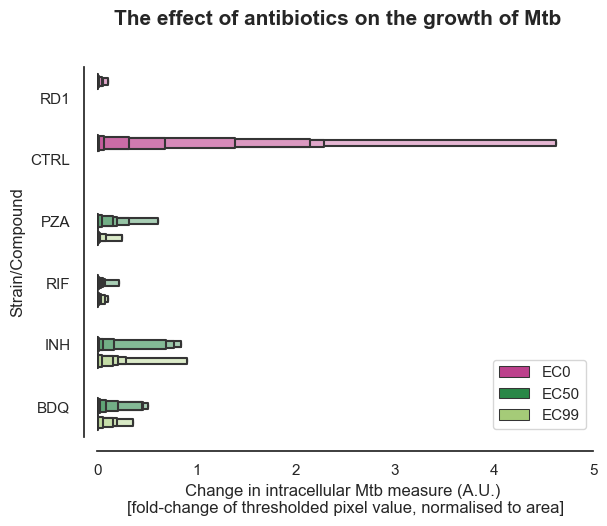

In [165]:
sns.boxenplot(x="dMtb", y="Strain/Compound",
            hue="Concentration", 
            palette=[expanded_piyg[-1], expanded_piyg[0], expanded_piyg[1]],
            data=df, 
            scale='linear'
              )  
sns.despine(offset = 10)
plt.xlim(0,5)
plt.xlabel("Change in intracellular Mtb measure (A.U.) \n[fold-change of thresholded pixel value, normalised to area]")
plt.gcf().suptitle('The effect of antibiotics on the growth of Mtb', 
                   fontsize=15, fontweight='bold', 
                  y = 1.0)
sns.despine(offset=10)
plt.legend(loc = 'lower right')
plt.savefig(os.path.join(output_dir, '+dMtb_boxenplot.png'), bbox_inches = 'tight', dpi = 314)

In [ ]:
for acq_ID in df['Acquisition ID'].unique():
    subset_df = [df['Acquisition ID'] == acq_ID]
    mean_max_dMtb_gradient = np.mean 